$$\frac{dy}{dx} = 0$$

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from edo import EDOModel


model = EDOModel(activations='sigmoid',denses=[10])
full_size=100
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
x = tf.linspace(0,1,full_size)[:,tf.newaxis]
y = tf.exp(-x**2/2)/(1+x+x**3)+x**2
model.fit(x,y,epochs=100,batch_size=full_size)

2025-01-05 16:29:34.647190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-05 16:29:34.678182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-05 16:29:34.690881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-05 16:29:34.880238: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ValueError: Unrecognized keyword arguments passed to EDOModel: {'hiddens': 1}

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


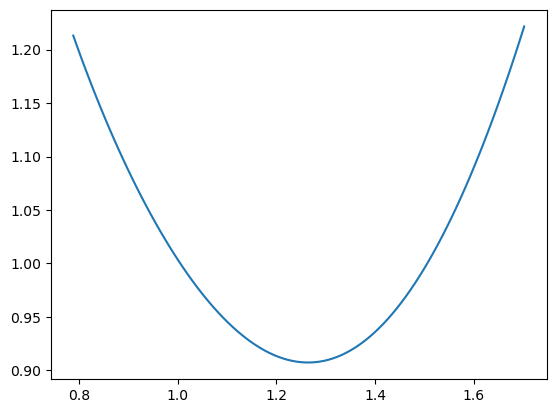

In [2]:
plt.plot(np.linspace(np.min(y),np.max(y)+.5,full_size),tf.math.abs(model.predict(x)-y))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step


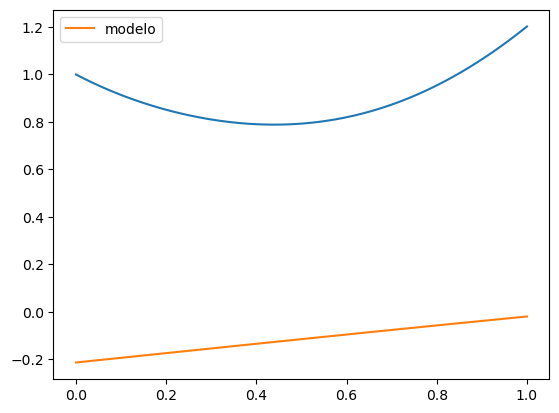

In [ ]:
plt.plot(x,y)
plt.plot(x,model.predict(x),label='modelo')
plt.legend()